<a href="https://colab.research.google.com/github/andeyosera/Text-Generator/blob/main/generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SERAPHINA ANDEYO -IN13/00050/21
EUNICE NZILANI -IN13/00105/21
OLIVIA JEPKIRUI -IN13/00109/21
WILLIAM NYAGAKA -IN13/00

In [43]:
pip install numpy tensorflow keras


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [44]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer


In [48]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [50]:
import pandas as pd

file_path = "/content/drive/MyDrive/archive2/quotes.json"

df = pd.read_json(file_path)  # Load the JSON file
print(df.head())  # Display first few rows


                                               Quote          Author  \
0  Don't cry because it's over, smile because it ...       Dr. Seuss   
1  Don't cry because it's over, smile because it ...       Dr. Seuss   
2  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   
3  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   
4  I'm selfish, impatient and a little insecure. ...  Marilyn Monroe   

                                                Tags  Popularity   Category  
0  [attributed-no-source, cry, crying, experience...    0.155666       life  
1  [attributed-no-source, cry, crying, experience...    0.155666  happiness  
2  [attributed-no-source, best, life, love, mista...    0.129122       love  
3  [attributed-no-source, best, life, love, mista...    0.129122       life  
4  [attributed-no-source, best, life, love, mista...    0.129122      truth  


In [110]:
import re
import string

# Assuming the text is under a column named "quote"
text = " ".join(df["Quote"].astype(str).tolist()).lower()

def clean_text(text):
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove multiple spaces
    return text

# Clean the text
text = clean_text(text)

# Print sample cleaned text
print(text[:500])  # Show the first 500 characters


dont cry because its over smile because it happened dont cry because its over smile because it happened im selfish impatient and a little insecure i make mistakes i am out of control and at times hard to handle but if you cant handle me at my worst then you sure as hell dont deserve me at my best im selfish impatient and a little insecure i make mistakes i am out of control and at times hard to handle but if you cant handle me at my worst then you sure as hell dont deserve me at my best im selfi


In [52]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Character-level tokenization
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(text)

# Convert text into sequences of numbers
sequences = tokenizer.texts_to_sequences([text])[0]

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 452


In [53]:
import numpy as np
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample dataset
text = """Recurrent Neural Networks are powerful for sequence data.
They remember past information and use it for future predictions.
LSTM and GRU help to overcome vanishing gradient issues."""

# Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequence_data = tokenizer.texts_to_sequences([text])[0]  # Convert text to sequences

# Define sequence length
seq_length = 5  # Adjust this as needed

# Create sequences for training
sequences = []
for i in range(seq_length, len(sequence_data)):
    sequences.append(sequence_data[i-seq_length:i+1])  # Input + target

# Convert to NumPy array
sequences = np.array(sequences)

# Split input (X) and output (y)
X, y = sequences[:, :-1], sequences[:, -1]

# One-hot encode `y`
vocab_size = len(tokenizer.word_index) + 1
y = keras.utils.to_categorical(y, num_classes=vocab_size)

print(f"Total Sequences: {len(X)}")


Total Sequences: 22


In [114]:
# Prepare data (function to convert text to sequences)
def prepare_data(text, sequence_length):
    sequences = []
    next_chars = []
    for i in range(0, len(text) - sequence_length):
        sequences.append([char_to_index[char] for char in text[i:i + sequence_length]])
        next_chars.append(char_to_index[text[i + sequence_length]])
    return np.array(sequences), np.array(next_chars)

# Prepare the data
X, y = prepare_data(text, sequence_length)

# One-hot encode `y`
y_one_hot = np.zeros((len(y), len(chars)))
for i, char_index in enumerate(y):
    y_one_hot[i, char_index] = 1

# Define the model
model = Sequential([
    Input(shape=(sequence_length, len(chars))),  # Input layer
    SimpleRNN(128),  # RNN layer
    Dense(len(chars), activation='softmax')  # Output layer
])

# Compile the model with the correct optimizer syntax
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01))

# Print model summary
print(model.summary())


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          19,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 22)                  │           2,838 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,166 (86.59 KB)

 Trainable params: 22,166 (86.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [117]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Input
from keras.optimizers import RMSprop

# Sample text dataset
text = "This is an example text for character-level RNN."

# Create a set of unique characters
chars = sorted(set(text))
char_to_index = {char: index for index, char in enumerate(chars)}  # Mapping of characters to indices
index_to_char = {index: char for index, char in enumerate(chars)}  # Reverse mapping

# Define sequence length
sequence_length = 10  # Choose the length of the input sequences

# Prepare data (function to convert text to sequences)
def prepare_data(text, sequence_length):
    sequences = []
    next_chars = []
    for i in range(0, len(text) - sequence_length):
        sequences.append([char_to_index[char] for char in text[i:i + sequence_length]])
        next_chars.append(char_to_index[text[i + sequence_length]])
    return np.array(sequences), np.array(next_chars)

# Prepare the data
X, y = prepare_data(text, sequence_length)

# One-hot encode input data
X_one_hot = np.zeros((X.shape[0], X.shape[1], len(chars)))
for i, seq in enumerate(X):
    for j, char_index in enumerate(seq):
        X_one_hot[i, j, char_index] = 1

# One-hot encode `y`
y_one_hot = np.zeros((len(y), len(chars)))
for i, char_index in enumerate(y):
    y_one_hot[i, char_index] = 1

# Define the model
model = Sequential([
    Input(shape=(sequence_length, len(chars))),  # Input layer
    SimpleRNN(128),  # RNN layer
    Dense(len(chars), activation='softmax')  # Output layer
])

# Compile the model with the correct optimizer syntax
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.01))

# Print model summary
print(model.summary())

# Train the model
model.fit(X_one_hot, y_one_hot, epochs=50, batch_size=128)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 128)                 │          19,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 22)                  │           2,838 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,166 (86.59 KB)

 Trainable params: 22,166 (86.59 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 3.1316
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 1.6530
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 2.3632
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 2.3086
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 2.1009
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3.7856
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 1.9121
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 2.0444
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 1.4644
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 1.5351
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - loss: 1.1728
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.5036
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.6726
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.9339
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.5682
Epoch 16/50
1/1 ━━━━━━━━

In [128]:
def generate_text(model, tokenizer, seed_text, length=200, sequence_length=10):
    generated_text = seed_text

    for _ in range(length):
        # Tokenize input
        token_list = tokenizer.texts_to_sequences([generated_text])[0]

        # Ensure token_list is not empty
        if len(token_list) == 0:
            print("⚠️ Tokenization failed! The seed text is not recognized.")
            return "Unable to generate text due to unrecognized seed text."

        # Pad sequences to match input length
        if len(token_list) < sequence_length:
            token_list = np.pad(token_list, (sequence_length - len(token_list), 0), 'constant')
        else:
            token_list = token_list[-sequence_length:]  # Use the last sequence_length tokens

        # One-hot encode the token_list
        vocab_size = 22  # Ensure this matches your model output shape
        one_hot_input = np.zeros((1, sequence_length, vocab_size))  # Shape: (1, sequence_length, vocab_size)

        # Populate the one-hot input
        for j, token in enumerate(token_list):
            if token < vocab_size:  # Ensure token is within the vocab size
                one_hot_input[0, j, token] = 1

        # Predict the next character
        predicted_probs = model.predict(one_hot_input, verbose=0)
        predicted_index = np.argmax(predicted_probs)
        predicted_char = tokenizer.index_word.get(predicted_index, '')  # Convert index to character safely

        # Append predicted character to the generated text
        generated_text += predicted_char

    return generated_text


In [129]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))


GPU Available: []


In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.utils import to_categorical

# Assuming vocab_size and seq_length are defined
model = Sequential([
    Embedding(vocab_size, 100, input_length=seq_length),  # Increased embedding size
    Bidirectional(LSTM(256, return_sequences=True)),  # Bidirectional LSTM
    LSTM(256),  # Another LSTM layer
    Dense(256, activation="relu"),
    Dense(vocab_size, activation="softmax")  # Output layer
])

# Compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# One-hot encode your target labels
y = to_categorical(y, num_classes=vocab_size)

# Train the model
model.fit(X, y, epochs=50, batch_size=128)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 3.2580
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.2368 - loss: 3.2472
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.1579 - loss: 3.2315
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.1579 - loss: 3.2073
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.1579 - loss: 3.1665
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.1579 - loss: 3.0950
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.1579 - loss: 2.9741
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.1579 - loss: 2.8189
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.1579 - loss: 2.8444
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.1579 - loss: 2.7570
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.1579 - loss: 2.6899
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.1579 - l

In [132]:
seq_length = 100  # Try different values like 20, 40, 100


In [133]:
import numpy as np
from tensorflow import keras  # Ensure you are using TensorFlow's Keras


In [135]:
import numpy as np
from tensorflow import keras

# Sample text for training the tokenizer
text = """Don't cry because it's over, smile because it happened.
I’m selfish, impatient, and a little insecure. I make mistakes,
I am out of control and at times hard to handle."""

# Initialize the tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(char_level=False)  # Change to word-level tokenization
tokenizer.fit_on_texts([text])  # Train tokenizer

# Convert text into word sequences
sequences = tokenizer.texts_to_sequences([text])[0]

# Update vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

# Example to check tokenization output
print("Tokenized output:", sequences)
print("Word index mapping:", tokenizer.word_index)


Vocabulary Size: 28
Tokenized output: [4, 5, 1, 6, 7, 8, 1, 9, 10, 11, 12, 13, 2, 14, 15, 16, 3, 17, 18, 3, 19, 20, 21, 22, 2, 23, 24, 25, 26, 27]
Word index mapping: {'because': 1, 'and': 2, 'i': 3, "don't": 4, 'cry': 5, "it's": 6, 'over': 7, 'smile': 8, 'it': 9, 'happened': 10, 'i’m': 11, 'selfish': 12, 'impatient': 13, 'a': 14, 'little': 15, 'insecure': 16, 'make': 17, 'mistakes': 18, 'am': 19, 'out': 20, 'of': 21, 'control': 22, 'at': 23, 'times': 24, 'hard': 25, 'to': 26, 'handle': 27}


In [136]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Example text
text = """Recurrent Neural Networks are powerful for sequence data.
They remember past information and use it for future predictions.
LSTM and GRU help to overcome vanishing gradient issues."""

# Create the Tokenizer
tokenizer = Tokenizer(char_level=False)  # Change to word-level tokenization
tokenizer.fit_on_texts([text])  # Train tokenizer

# Convert text into word sequences
sequences = tokenizer.texts_to_sequences([text])[0]

# Update vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")


Vocabulary Size: 26


In [137]:
X, y = [], []
seq_length = 10  # Adjust sequence length for words

for i in range(len(sequences) - seq_length):
    X.append(sequences[i: i + seq_length])
    y.append(sequences[i + seq_length])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode target labels
y = keras.utils.to_categorical(y, num_classes=vocab_size)


In [138]:
model = Sequential([
    Embedding(vocab_size, 100, input_length=seq_length),
    LSTM(256, return_sequences=True),
    LSTM(256),
    Dense(256, activation="relu"),
    Dense(vocab_size, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=50, batch_size=128)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 3.2582
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2353 - loss: 3.2507
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - accuracy: 0.2353 - loss: 3.2410
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.1765 - loss: 3.2274
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.1765 - loss: 3.2073
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.1765 - loss: 3.1765
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.1765 - loss: 3.1288
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.1765 - loss: 3.0545
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.1765 - loss: 2.9417
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.1765 - loss: 2.7802
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1765 - loss: 2.5821
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.1765 - l

In [139]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

# Sample text for training the tokenizer
text = """Don't cry because it's over, smile because it happened.
I’m selfish, impatient, and a little insecure. I make mistakes,
I am out of control and at times hard to handle."""

# Initialize and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])  # Ensure tokenizer is fitted on the training text

# Define the sequence length for the model
seq_length = 10  # Adjust according to your model's expected input length

def generate_text(model, tokenizer, seed_text, length=100):
    generated_text = seed_text

    for _ in range(length):
        # Tokenize the input seed text
        token_list = tokenizer.texts_to_sequences([generated_text])[0]

        # Ensure token_list has the expected length by padding with zeros
        if len(token_list) < seq_length:
            token_list = [0] * (seq_length - len(token_list)) + token_list  # Prepend zeros
        else:
            token_list = token_list[-seq_length:]  # Keep only the last `seq_length` tokens

        # Convert to numpy array and reshape
        token_list = np.array(token_list).reshape(1, seq_length)

        # Predict the next word
        predicted_index = np.argmax(model.predict(token_list), axis=-1)[0]

        # Ensure predicted index is within vocabulary size
        if predicted_index < len(tokenizer.word_index) + 1:  # +1 for zero-index
            predicted_word = tokenizer.index_word[predicted_index]
            # Append the predicted word to the generated text
            generated_text += " " + predicted_word
        else:
            break  # Exit loop if predicted index is not valid

    return generated_text

# Example: Attempt to generate text with the new seed phrase
seed_phrase = "life is"  # Use a seed phrase from your vocabulary
generated_text = generate_text(model, tokenizer, seed_phrase, length=100)
print(generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

In [96]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step - accuracy: 0.0500 - loss: 3.3323
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.2000 - loss: 3.3239
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2000 - loss: 3.3136
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.2000 - loss: 3.2988
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.2000 - loss: 3.2766
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.2000 - loss: 3.2425
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.2000 - loss: 3.1900
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.2000 - loss: 3.1096
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.2000 - loss: 2.9912
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.2000 - loss: 2.8387
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.1500 - loss: 2.7005
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.1500 - los

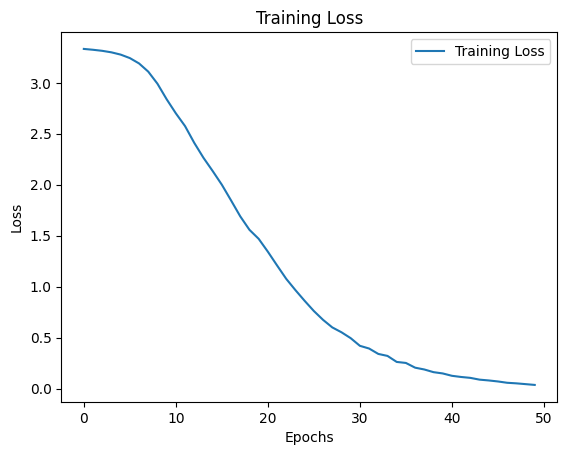

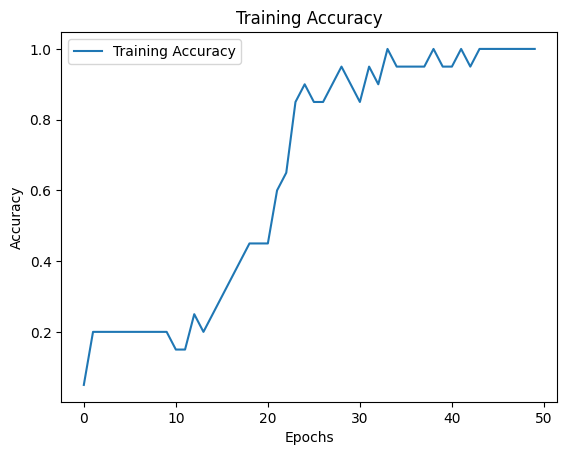

In [140]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Sample text for training the tokenizer
text = """Don't cry because it's over, smile because it happened.
I’m selfish, impatient, and a little insecure. I make mistakes,
I am out of control and at times hard to handle."""

# Prepare the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]

seq_length = 10  # Adjust sequence length for words
X, y = [], []

for i in range(len(sequences) - seq_length):
    X.append(sequences[i: i + seq_length])
    y.append(sequences[i + seq_length])

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# One-hot encode target labels
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for padding
y = to_categorical(y, num_classes=vocab_size)

# Define the model
model = Sequential([
    Embedding(vocab_size, 100, input_length=seq_length),
    LSTM(256, return_sequences=True),
    LSTM(256),
    Dense(256, activation="relu"),
    Dense(vocab_size, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model and store the training history
history = model.fit(X, y, epochs=50, batch_size=128)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()
plt.show()


In [141]:
seed_phrase = "life is"
generated_text = generate_text(model, tokenizer, seed_phrase, length=100)
print("Generated Text:", generated_text)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━

In [104]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

def generate_text_with_temperature(model, tokenizer, input_text, num_words, temperature=1.0):
    input_sequence = tokenizer.texts_to_sequences([input_text])[0]
    generated_text = input_text

    for _ in range(num_words):
        padded_sequence = pad_sequences([input_sequence], maxlen=seq_length, padding='pre')
        predicted_probs = model.predict(padded_sequence, verbose=0)[0]

        # Apply temperature scaling
        predicted_probs = np.asarray(predicted_probs).astype('float64')
        predicted_probs = np.exp(predicted_probs / temperature) / np.sum(np.exp(predicted_probs / temperature))

        predicted_word_index = np.random.choice(range(len(predicted_probs)), p=predicted_probs)

        predicted_word = tokenizer.index_word.get(predicted_word_index, '')
        generated_text += ' ' + predicted_word

        input_sequence.append(predicted_word_index)

    return generated_text

# Example usage
seed_text = "life is beautiful"
predicted_output = generate_text_with_temperature(model, tokenizer, seed_text, num_words=10, temperature=1.2)
print(predicted_output)


life is beautiful control because mistakes cry selfish happened happened to hard at


In [105]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences

def generate_text_with_temperature(model, tokenizer, input_text, num_words, temperature=1.0):
    input_sequence = tokenizer.texts_to_sequences([input_text])[0]
    generated_text = input_text

    for _ in range(num_words):
        padded_sequence = pad_sequences([input_sequence], maxlen=seq_length, padding='pre')
        predicted_probs = model.predict(padded_sequence, verbose=0)[0]

        # Apply temperature scaling
        predicted_probs = np.asarray(predicted_probs).astype('float64')
        predicted_probs = np.exp(predicted_probs / temperature) / np.sum(np.exp(predicted_probs / temperature))

        predicted_word_index = np.random.choice(range(len(predicted_probs)), p=predicted_probs)

        predicted_word = tokenizer.index_word.get(predicted_word_index, '')
        generated_text += ' ' + predicted_word

        input_sequence.append(predicted_word_index)

    return generated_text

# Example usage
seed_text = "Don't cry"
predicted_output = generate_text_with_temperature(model, tokenizer, seed_text, num_words=10, temperature=1.2)
print(predicted_output)


Don't cry i hard don't impatient insecure selfish and happened  i’m
